### Problem
A company currently ships products from 5 plants to 4 warehouses. The company is considering the option of
closing down one or more plants. This would increase distribution cost but perhaps lower overall cost. What
plants, if any, should the company close?

Based on an example from Frontline Systems: http://www.solver.com/disfacility.htm

In [1]:
# First, import packages
import pandas as pd
from IPython.display import Image 
import gurobipy as gp
from gurobipy import GRB

# Define a gurobipy model for the decision problem
m = gp.Model('facility')

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-29


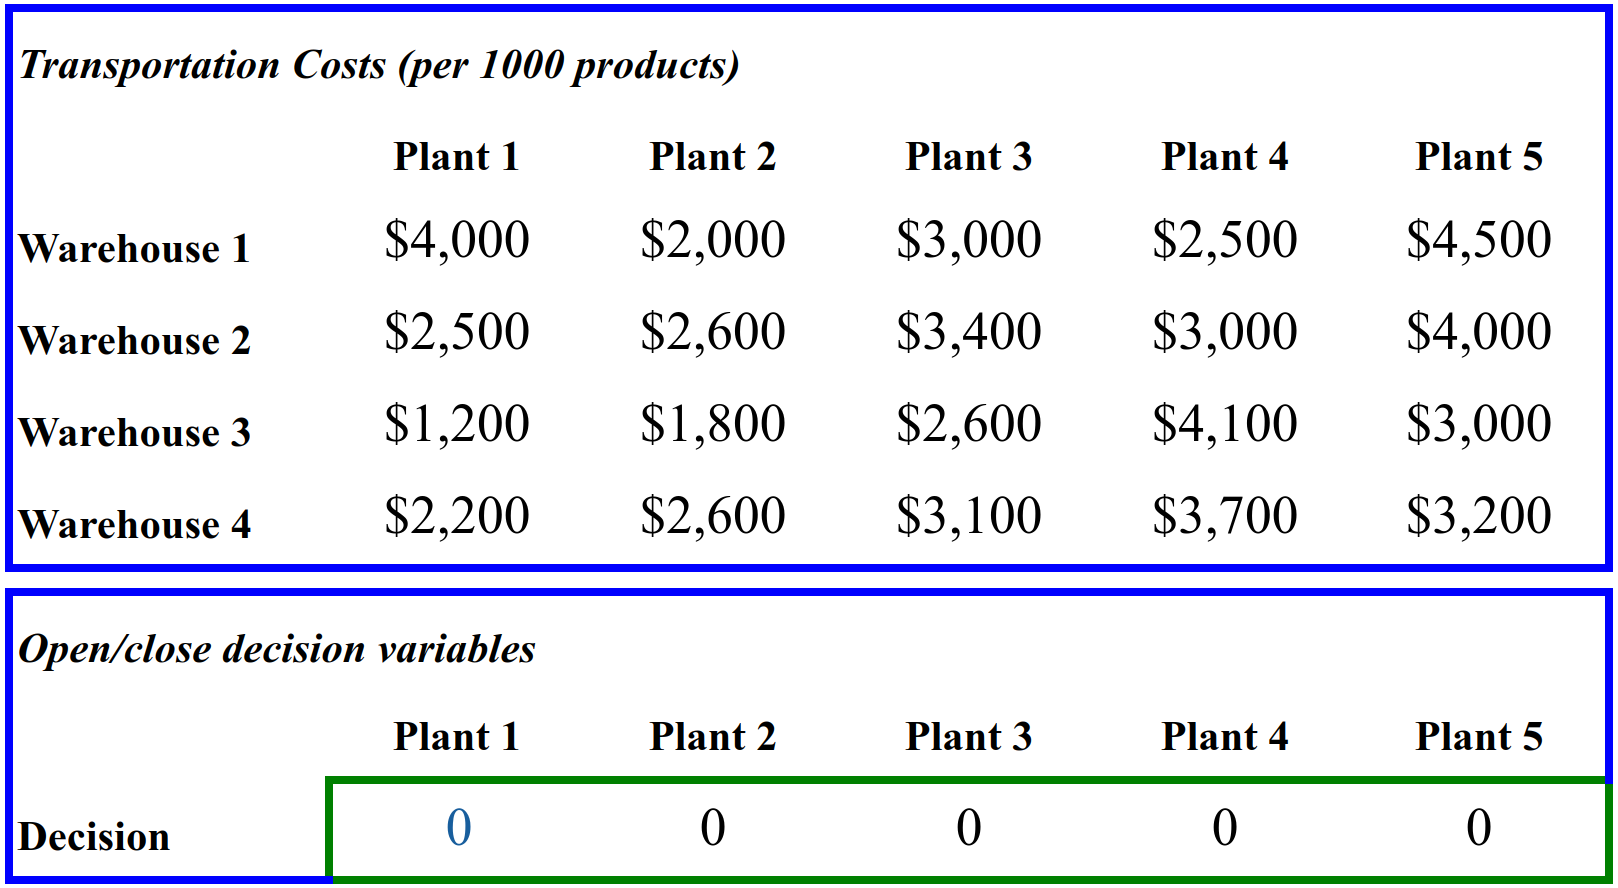

In [2]:
# Table 01: 
Image("facility.png", width=450, height=350)

### Data

In [3]:
# Sets P and W, respectively
# When we code sets we can be more descriptive in the name
plants = ['P1','P2','P3','P4','P5']
warehouses = ['W1','W2','W3','W4']

In [4]:
capacity = pd.Series([20, 22, 17, 19, 18], index = plants, name = "Plant Capacity")
capacity.to_frame()
#capacity

,Plant Capacity
P1,20
P2,22
P3,17
P4,19
P5,18


In [5]:
demand = pd.Series([15, 18, 14, 20], index = warehouses, name = "Demand")
demand.to_frame()
#demand

,Demand
W1,15
W2,18
W3,14
W4,20


In [6]:
# Fixed costs for each plant
fixedCosts = pd.Series([12000, 15000, 17000, 13000, 16000], index = plants, name = "Fixed Cost")
fixedCosts.to_frame()

,Fixed Cost
P1,12000
P2,15000
P3,17000
P4,13000
P5,16000


In [7]:
# Transportation costs per thousand units
# Load annual lost interest cost data thorough dictionary command
transCosts = {    
    ('P1', 'W1'): 4000,
    ('P1', 'W2'): 2500,
    ('P1', 'W3'): 1200,
    ('P1', 'W4'): 2200,
    ('P2', 'W1'): 2000,
    ('P2', 'W2'): 2600,
    ('P2', 'W3'): 1800,
    ('P2', 'W4'): 2600, 
    ('P3', 'W1'): 3000,
    ('P3', 'W2'): 3400,
    ('P3', 'W3'): 2600,
    ('P3', 'W4'): 3100,
    ('P4', 'W1'): 2500,
    ('P4', 'W2'): 3000,
    ('P4', 'W3'): 4100,
    ('P4', 'W4'): 3700,
    ('P5', 'W1'): 4500,
    ('P5', 'W2'): 4000,
    ('P5', 'W3'): 3000,
    ('P5', 'W4'): 3200
}

### Decision Variable

In [12]:
# Plant open decision variables: open[p] == 1 if plant p is open.
open = m.addVars(plants, vtype=GRB.BINARY, obj=fixedCosts, name="open")
m.update()
open

# open = []
# for p in plants:
#    open.append(m.addVar(vtype=GRB.BINARY, obj=fixedCosts[p], name="open[%d]" % p))
# m.update()
# open

{'P1': <gurobi.Var open[P1]>,
 'P2': <gurobi.Var open[P2]>,
 'P3': <gurobi.Var open[P3]>,
 'P4': <gurobi.Var open[P4]>,
 'P5': <gurobi.Var open[P5]>}

In [13]:
# Transportation decision variables: transport[w,p] captures the
# optimal quantity to transport to warehouse w from plant p
transport = m.addVars(plants, warehouses, vtype=GRB.CONTINUOUS, obj=transCosts, name="trans")
m.update()

transport

# transport = []
# for w in warehouses:
#     transport.append([])
#     for p in plants:
#         transport[w].append(m.addVar(obj=transCosts[w][p],
#                                      name="trans[%d,%d]" % (w, p)))

{('P1', 'W1'): <gurobi.Var trans[P1,W1]>,
 ('P1', 'W2'): <gurobi.Var trans[P1,W2]>,
 ('P1', 'W3'): <gurobi.Var trans[P1,W3]>,
 ('P1', 'W4'): <gurobi.Var trans[P1,W4]>,
 ('P2', 'W1'): <gurobi.Var trans[P2,W1]>,
 ('P2', 'W2'): <gurobi.Var trans[P2,W2]>,
 ('P2', 'W3'): <gurobi.Var trans[P2,W3]>,
 ('P2', 'W4'): <gurobi.Var trans[P2,W4]>,
 ('P3', 'W1'): <gurobi.Var trans[P3,W1]>,
 ('P3', 'W2'): <gurobi.Var trans[P3,W2]>,
 ('P3', 'W3'): <gurobi.Var trans[P3,W3]>,
 ('P3', 'W4'): <gurobi.Var trans[P3,W4]>,
 ('P4', 'W1'): <gurobi.Var trans[P4,W1]>,
 ('P4', 'W2'): <gurobi.Var trans[P4,W2]>,
 ('P4', 'W3'): <gurobi.Var trans[P4,W3]>,
 ('P4', 'W4'): <gurobi.Var trans[P4,W4]>,
 ('P5', 'W1'): <gurobi.Var trans[P5,W1]>,
 ('P5', 'W2'): <gurobi.Var trans[P5,W2]>,
 ('P5', 'W3'): <gurobi.Var trans[P5,W3]>,
 ('P5', 'W4'): <gurobi.Var trans[P5,W4]>}

### Constraints 

In [14]:
# Capacity/Production constraints
# Note that the right-hand limit sets the production to zero if the plant is closed
#c1 = m.addConstrs((transport.sum("*", p) <= capacity[p] * open[p] for p in plants), name = "Capacity")
#m.update()
#c1


c1 = m.addConstrs((gp.quicksum(transport[p,w] for w in warehouses) <= capacity[p] * open[p] for p in plants), name = 'Capacity')
m.update()
c1

# Using Python looping constructs, the preceding would be...
#
# for p in plants:
#     m.addConstr(sum(transport[w][p] for w in warehouses)
#                 <= capacity[p] * open[p], "Capacity[%d]" % p)


{'P1': <gurobi.Constr Capacity[P1]>,
 'P2': <gurobi.Constr Capacity[P2]>,
 'P3': <gurobi.Constr Capacity[P3]>,
 'P4': <gurobi.Constr Capacity[P4]>,
 'P5': <gurobi.Constr Capacity[P5]>}

In [15]:
# Demand constraints
c2 = m.addConstrs((gp.quicksum(transport[p,w] for p in plants) == demand[w] for w in warehouses), name ="Demand")
m.update()
c2

# ... and the preceding would be ...
# for w in warehouses:
#     m.addConstr(sum(transport[w][p] for p in plants) == demand[w],
#                 "Demand[%d]" % w)

{'W1': <gurobi.Constr Demand[W1]>,
 'W2': <gurobi.Constr Demand[W2]>,
 'W3': <gurobi.Constr Demand[W3]>,
 'W4': <gurobi.Constr Demand[W4]>}

### Objective Function

- **Cost**: Minimize total costs.

\begin{equation}
\text{Minimize} \quad Z = \sum_{p,w}{\text{transport}_{pw}\text{open}_{p}}+
                           \sum_{f,c}{\text{fixedCosts}_{p}\text{open}_{p}}
\end{equation}

In [66]:
m.setObjective(gp.quicksum(transCosts[p,w]*open[p] for p in plants)+fixedCosts[p]*open[p] for p in plants),GRB.MINIMIZE)

GurobiError: Unable to convert argument to an expression

In [57]:
# The objective is to minimize the total fixed and variable costs
m.ModelSense = GRB.MINIMIZE

In [58]:
# Save model
m.write("facilityPY.lp")

In [63]:
# Solve
m.optimize()

for v in m.getVars():
    print(f"{v.VarName} {v.X:g}")

print(f"Objective Function: {m.ObjVal:g}")

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Linux Mint 21.3")

CPU model: AMD Ryzen 5 5600G with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 18 rows, 50 columns and 90 nonzeros
Model fingerprint: 0xd1997180
Variable types: 40 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [2e+04, 3e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 2e+01]

MIP start from previous solve produced solution with objective 101300 (0.00s)
Loaded MIP start from previous solve with objective 101300

Presolve removed 9 rows and 25 columns
Presolve time: 0.00s
Presolved: 9 rows, 25 columns, 45 nonzeros
Variable types: 20 continuous, 5 integer (5 binary)

Root relaxation: objective 8.243333e+04, 10 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work


In [56]:
# Solve
m.optimize()

# Print solution
print(f"\nTOTAL COSTS: {m.ObjVal:g}")


print("SOLUTION:")
for p in plants:
    if open[p].X > 0.99:
        print(f"Plant {p} open")
        for w in warehouses:
            if transport[w, p].X > 0:
                print(f"  Transport {transport[w, p].X:g} units to warehouse {w}")
    else:
        print(f"Plant {p} closed!")


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (linux64 - "Linux Mint 21.3")

CPU model: AMD Ryzen 5 5600G with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 18 rows, 50 columns and 90 nonzeros
Model fingerprint: 0x0f544261
Variable types: 40 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [6e+04, 8e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 2e+01]
Presolved: 9 rows, 25 columns, 45 nonzeros

Continuing optimization...


Cutting planes:
  MIR: 1
  Flow cover: 3

Explored 1 nodes (11 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 2: 270900 293100 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.709000000000e+05, best bound 2.709000000000e+05, gap 0.0000%

TOTAL COSTS: 270900
SOLUTION:
Plant P1 open


KeyError: ('W1', 'P1')

In [ ]:
# Guess at the starting point: close the plant with the highest fixed costs;
# open all others

# First open all plants
for p in plants:
    open[p].Start = 1.0

# Now close the plant with the highest fixed cost
print("Initial guess:")
maxFixed = max(fixedCosts)
for p in plants:
    if fixedCosts[p] == maxFixed:
        open[p].Start = 0.0
        print(f"Closing plant {p}")
        break
print("")

# Use barrier to solve root relaxation
m.Params.Method = 2